### In this research notebook, I will explore different techniques to clean the data so that it is set up in a way that is clean and easy to work with. Additionally, I will ask some EDA questions and create graphs what can deliver insights quickly. One completed, I will have it generate a new excel file with the clean data, different views, and graphs embedded in the file. Finally, I will create a financial model that models out a 2015 forecast.

In [ ]:
#importing libraries to work with the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from openpyxl import load_workbook
from openpyxl.drawing.image import Image

### Section 1: Data cleaning

In [ ]:
#reading the excel file and setting it to a dataframe variable so we can work with it.
df = pd.read_csv("Financials.csv")
df.head()


,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",01/06/2014,6,June,2014


In [ ]:
#inspecting how large of a dataset we have.
df.shape

(700, 16)

In [ ]:
#getting information on the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Segment                700 non-null    object
 1   Country                700 non-null    object
 2    Product               700 non-null    object
 3    Discount Band         700 non-null    object
 4    Units Sold            700 non-null    object
 5    Manufacturing Price   700 non-null    object
 6    Sale Price            700 non-null    object
 7    Gross Sales           700 non-null    object
 8    Discounts             700 non-null    object
 9     Sales                700 non-null    object
 10   COGS                  700 non-null    object
 11   Profit                700 non-null    object
 12  Date                   700 non-null    object
 13  Month Number           700 non-null    int64 
 14   Month Name            700 non-null    object
 15  Year                   

In [178]:
df.describe()

,Month Number,Year
count,700.000000,700.000000
mean,7.900000,2013.750000
std,3.377321,0.433322
min,1.000000,2013.000000
25%,5.750000,2013.750000
50%,9.000000,2014.000000
75%,10.250000,2014.000000
max,12.000000,2014.000000


In [179]:
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",01/06/2014,6,June,2014


In [180]:
df_copy = df.copy()

In [181]:
df_copy.columns = df.columns.str.lower()

In [182]:
df_copy.columns

Index(['segment', 'country', ' product ', ' discount band ', ' units sold ',
       ' manufacturing price ', ' sale price ', ' gross sales ', ' discounts ',
       '  sales ', ' cogs ', ' profit ', 'date', 'month number',
       ' month name ', 'year'],
      dtype='object')

In [183]:
cleaned_columns = [col.strip() for col in df_copy.columns]

In [184]:
cleaned_columns

['segment',
 'country',
 'product',
 'discount band',
 'units sold',
 'manufacturing price',
 'sale price',
 'gross sales',
 'discounts',
 'sales',
 'cogs',
 'profit',
 'date',
 'month number',
 'month name',
 'year']

In [185]:
df_copy.columns = cleaned_columns

In [186]:
df_copy.columns

Index(['segment', 'country', 'product', 'discount band', 'units sold',
       'manufacturing price', 'sale price', 'gross sales', 'discounts',
       'sales', 'cogs', 'profit', 'date', 'month number', 'month name',
       'year'],
      dtype='object')

In [187]:
rows_to_adjust = ["units sold", "manufacturing price", "sale price", "gross sales", "discounts", "sales", "cogs", "profit"]

In [188]:
df_copy

,segment,country,product,discount band,units sold,manufacturing price,sale price,gross sales,discounts,sales,cogs,profit,date,month number,month name,year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",01/06/2014,6,June,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Small Business,France,Amarilla,High,"$2,475.00",$260.00,$300.00,"$7,42,500.00","$1,11,375.00","$6,31,125.00","$6,18,750.00","$12,375.00",01/03/2014,3,March,2014
696,Small Business,Mexico,Amarilla,High,$546.00,$260.00,$300.00,"$1,63,800.00","$24,570.00","$1,39,230.00","$1,36,500.00","$2,730.00",01/10/2014,10,October,2014
697,Government,Mexico,Montana,High,"$1,368.00",$5.00,$7.00,"$9,576.00","$1,436.40","$8,139.60","$6,840.00","$1,299.60",01/02/2014,2,February,2014
698,Government,Canada,Paseo,High,$723.00,$10.00,$7.00,"$5,061.00",$759.15,"$4,301.85","$3,615.00",$686.85,01/04/2014,4,April,2014


In [189]:
print(df_copy['gross sales'].head(10))

print(df_copy['gross sales'].dtype)

0       $32,370.00 
1       $26,420.00 
2       $32,670.00 
3       $13,320.00 
4       $37,050.00 
5     $5,29,550.00 
6       $13,815.00 
7       $30,216.00 
8       $37,980.00 
9       $18,540.00 
Name: gross sales, dtype: object
object


In [190]:
#Adjust the rows with dollar signs to remove them.
df_copy[rows_to_adjust] = df_copy[rows_to_adjust].apply(lambda x: x.str.replace('$', ""))

In [191]:
#Adjust the rows with commas to remove them.
df_copy[rows_to_adjust] = df_copy[rows_to_adjust].apply(lambda x: x.str.replace(',', ""))

In [192]:
#Adjust the rows with commas to remove them.
df_copy[rows_to_adjust] = df_copy[rows_to_adjust].apply(lambda x: x.str.strip())

In [193]:
#Adjust leading and trailing white space for all columns
additional_adjustment_columns = ['segment', 'country', 'product', 'discount band', 'month name']
df_copy[additional_adjustment_columns] = df_copy[additional_adjustment_columns].apply(lambda x: x.str.strip())

In [194]:
#Adjust the rows with dashes to remove them and replace with 0's.
df_copy['discounts'] = df_copy['discounts'].str.replace("-", "0")

In [196]:
df_copy

,segment,country,product,discount band,units sold,manufacturing price,sale price,gross sales,discounts,sales,cogs,profit,date,month number,month name,year
0,Government,Canada,Carretera,None,1618.50,3.00,20.00,32370.00,0,32370.00,16185.00,16185.00,01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,1321.00,3.00,20.00,26420.00,0,26420.00,13210.00,13210.00,01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,2178.00,3.00,15.00,32670.00,0,32670.00,21780.00,10890.00,01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,888.00,3.00,15.00,13320.00,0,13320.00,8880.00,4440.00,01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.00,3.00,15.00,37050.00,0,37050.00,24700.00,12350.00,01/06/2014,6,June,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Small Business,France,Amarilla,High,2475.00,260.00,300.00,742500.00,111375.00,631125.00,618750.00,12375.00,01/03/2014,3,March,2014
696,Small Business,Mexico,Amarilla,High,546.00,260.00,300.00,163800.00,24570.00,139230.00,136500.00,2730.00,01/10/2014,10,October,2014
697,Government,Mexico,Montana,High,1368.00,5.00,7.00,9576.00,1436.40,8139.60,6840.00,1299.60,01/02/2014,2,February,2014
698,Government,Canada,Paseo,High,723.00,10.00,7.00,5061.00,759.15,4301.85,3615.00,686.85,01/04/2014,4,April,2014


In [ ]:
#We can't convert the item to a float so we need to investigate the problem.
df_copy[rows_to_adjust].astype(float)

ValueError: could not convert string to float: '-'

In [198]:
#It still seems there are some problems with "-". Let's try to see which columns have it.

for col in rows_to_adjust:
    print(f"Column: {col}")
    print("Contains '-':", (df_copy[col] == "-").sum()) 
    print("Sample values:", df_copy[col].head(10).tolist())
    print("---")

Column: units sold
Contains '-': 0
Sample values: ['1618.50', '1321.00', '2178.00', '888.00', '2470.00', '1513.00', '921.00', '2518.00', '1899.00', '1545.00']
---
Column: manufacturing price
Contains '-': 0
Sample values: ['3.00', '3.00', '3.00', '3.00', '3.00', '3.00', '5.00', '5.00', '5.00', '5.00']
---
Column: sale price
Contains '-': 0
Sample values: ['20.00', '20.00', '15.00', '15.00', '15.00', '350.00', '15.00', '12.00', '20.00', '12.00']
---
Column: gross sales
Contains '-': 0
Sample values: ['32370.00', '26420.00', '32670.00', '13320.00', '37050.00', '529550.00', '13815.00', '30216.00', '37980.00', '18540.00']
---
Column: discounts
Contains '-': 0
Sample values: ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0']
---
Column: sales
Contains '-': 0
Sample values: ['32370.00', '26420.00', '32670.00', '13320.00', '37050.00', '529550.00', '13815.00', '30216.00', '37980.00', '18540.00']
---
Column: cogs
Contains '-': 0
Sample values: ['16185.00', '13210.00', '21780.00', '8880.00', '24

In [199]:
#this confirms that there are 5 instance of only "-" within profit and therefore we can replace them with 0's.
df_copy[df_copy['profit'] == "-"]

,segment,country,product,discount band,units sold,manufacturing price,sale price,gross sales,discounts,sales,cogs,profit,date,month number,month name,year
187,Enterprise,Mexico,Montana,Low,1138.00,5.00,125.00,142250.00,5690.00,136560.00,136560.00,-,01/12/2014,12,December,2014
189,Enterprise,Germany,Paseo,Low,795.00,10.00,125.00,99375.00,3975.00,95400.00,95400.00,-,01/03/2014,3,March,2014
193,Enterprise,France,Paseo,Low,2988.00,10.00,125.00,373500.00,14940.00,358560.00,358560.00,-,01/07/2014,7,July,2014
200,Enterprise,Mexico,Paseo,Low,1138.00,10.00,125.00,142250.00,5690.00,136560.00,136560.00,-,01/12/2014,12,December,2014
209,Enterprise,Mexico,Amarilla,Low,1074.00,260.00,125.00,134250.00,5370.00,128880.00,128880.00,-,01/04/2014,4,April,2014


In [200]:
df_copy['profit'] = df_copy['profit'].str.replace("-", "0")

In [201]:
#run the same code and no longer exist - perfect.
df_copy[df_copy['profit'] == "-"]

,segment,country,product,discount band,units sold,manufacturing price,sale price,gross sales,discounts,sales,cogs,profit,date,month number,month name,year


In [202]:
df_copy[rows_to_adjust].astype(float)

ValueError: could not convert string to float: '(4533.75)'

In [203]:
#See which rows contain negative values

for col in rows_to_adjust:
    print(f"Column: {col}")
    print("Contains parenthesis:", (df_copy[col].str.contains(r"\(.*\)", na=False)).sum())
    print("Sample values:", df_copy[col].head(10).tolist())
    print("---")

Column: units sold
Contains parenthesis: 0
Sample values: ['1618.50', '1321.00', '2178.00', '888.00', '2470.00', '1513.00', '921.00', '2518.00', '1899.00', '1545.00']
---
Column: manufacturing price
Contains parenthesis: 0
Sample values: ['3.00', '3.00', '3.00', '3.00', '3.00', '3.00', '5.00', '5.00', '5.00', '5.00']
---
Column: sale price
Contains parenthesis: 0
Sample values: ['20.00', '20.00', '15.00', '15.00', '15.00', '350.00', '15.00', '12.00', '20.00', '12.00']
---
Column: gross sales
Contains parenthesis: 0
Sample values: ['32370.00', '26420.00', '32670.00', '13320.00', '37050.00', '529550.00', '13815.00', '30216.00', '37980.00', '18540.00']
---
Column: discounts
Contains parenthesis: 0
Sample values: ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0']
---
Column: sales
Contains parenthesis: 0
Sample values: ['32370.00', '26420.00', '32670.00', '13320.00', '37050.00', '529550.00', '13815.00', '30216.00', '37980.00', '18540.00']
---
Column: cogs
Contains parenthesis: 0
Sample val

In [204]:
df_copy['profit'] = df_copy['profit'].str.replace("(", "-")
df_copy['profit'] = df_copy['profit'].str.replace(")", "")

In [205]:
for col in rows_to_adjust:
    print(f"Column: {col}")
    print("Contains parenthesis:", (df_copy[col].str.contains(r"\(.*\)", na=False)).sum())
    print("Sample values:", df_copy[col].head(10).tolist())
    print("---")

Column: units sold
Contains parenthesis: 0
Sample values: ['1618.50', '1321.00', '2178.00', '888.00', '2470.00', '1513.00', '921.00', '2518.00', '1899.00', '1545.00']
---
Column: manufacturing price
Contains parenthesis: 0
Sample values: ['3.00', '3.00', '3.00', '3.00', '3.00', '3.00', '5.00', '5.00', '5.00', '5.00']
---
Column: sale price
Contains parenthesis: 0
Sample values: ['20.00', '20.00', '15.00', '15.00', '15.00', '350.00', '15.00', '12.00', '20.00', '12.00']
---
Column: gross sales
Contains parenthesis: 0
Sample values: ['32370.00', '26420.00', '32670.00', '13320.00', '37050.00', '529550.00', '13815.00', '30216.00', '37980.00', '18540.00']
---
Column: discounts
Contains parenthesis: 0
Sample values: ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0']
---
Column: sales
Contains parenthesis: 0
Sample values: ['32370.00', '26420.00', '32670.00', '13320.00', '37050.00', '529550.00', '13815.00', '30216.00', '37980.00', '18540.00']
---
Column: cogs
Contains parenthesis: 0
Sample val

In [220]:
df_copy[rows_to_adjust] = df_copy[rows_to_adjust].astype(float)

In [221]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   segment              700 non-null    object 
 1   country              700 non-null    object 
 2   product              700 non-null    object 
 3   discount band        700 non-null    object 
 4   units sold           700 non-null    float64
 5   manufacturing price  700 non-null    float64
 6   sale price           700 non-null    float64
 7   gross sales          700 non-null    float64
 8   discounts            700 non-null    float64
 9   sales                700 non-null    float64
 10  cogs                 700 non-null    float64
 11  profit               700 non-null    float64
 12  date                 700 non-null    object 
 13  month number         700 non-null    int64  
 14  month name           700 non-null    object 
 15  year                 700 non-null    int

In [229]:
df_copy

,segment,country,product,discount band,units sold,manufacturing price,sale price,gross sales,discounts,sales,cogs,profit,date,month number,month name,year
0,Government,Canada,Carretera,None,1618.5,3.0,20.0,32370.0,0.00,32370.00,16185.0,16185.00,01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,1321.0,3.0,20.0,26420.0,0.00,26420.00,13210.0,13210.00,01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,3.0,15.0,32670.0,0.00,32670.00,21780.0,10890.00,01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,3.0,15.0,13320.0,0.00,13320.00,8880.0,4440.00,01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,3.0,15.0,37050.0,0.00,37050.00,24700.0,12350.00,01/06/2014,6,June,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Small Business,France,Amarilla,High,2475.0,260.0,300.0,742500.0,111375.00,631125.00,618750.0,12375.00,01/03/2014,3,March,2014
696,Small Business,Mexico,Amarilla,High,546.0,260.0,300.0,163800.0,24570.00,139230.00,136500.0,2730.00,01/10/2014,10,October,2014
697,Government,Mexico,Montana,High,1368.0,5.0,7.0,9576.0,1436.40,8139.60,6840.0,1299.60,01/02/2014,2,February,2014
698,Government,Canada,Paseo,High,723.0,10.0,7.0,5061.0,759.15,4301.85,3615.0,686.85,01/04/2014,4,April,2014


## Now that the dataframe is clean of leading and trailing 0s, dollar signs, erroneous commas, and in a format that is workable to extract meaningful information to questions, we can start working with it within this workbook, and also get it in a format where it is excel ready.

In [ ]:
#Export DataFrame to Excel if you only want the clean data.
output_path = "C:/Users/Chris/Desktop/Documents/Company Financials Model Project/cleaned_financials.xlsx"
df_copy.to_excel(output_path, sheet_name="Financials", index=False)
print("DataFrame exported to Excel!")

DataFrame exported to Excel!


In [ ]:
#How many unique years are there that we are working with in this data set? Answer: 2 - 2013 and 2014
df_copy['year'].unique()

array([2014, 2013])

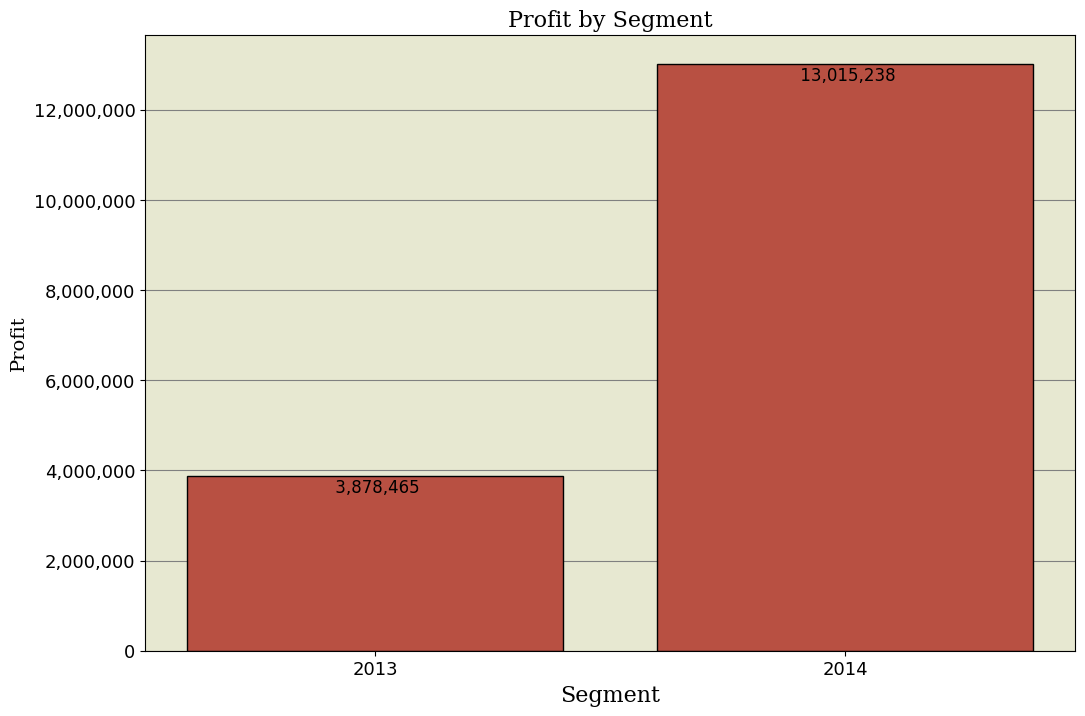

In [ ]:
#Which year had better profitability?

profit_by_year = df_copy.groupby("year")["profit"].sum().reset_index()
profit_by_year.sort_values(by="profit", ascending=False)
profit_by_year['year']= profit_by_year['year'].astype(str)

#Plot the bar chart
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(x=profit_by_year['year'], height=profit_by_year['profit'], color='#B85042', edgecolor='black', zorder=2)

#Custom Font Dictionaries
font1 = {'family':'serif','color':'black','size':16}
font2 = {'family':'serif','color':'black','size':14}

#Set title, axis names, customize fonts.
ax.set_xlabel("Segment", fontdict=font1)
ax.set_ylabel("Profit", fontdict=font2)
ax.set_title("Profit by Segment", fontdict=font1)

#Customize graph
ax.grid(axis = 'y', color='grey')
ax.set_facecolor('#E7E8D1')
plt.xticks(rotation=0, ha='center', fontsize=13)
plt.yticks(fontsize=13)

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x):,}"))

#Annotate each bar
for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, 
        height - 50000, 
        f'{height: ,.0f}', 
        ha='center', 
        va='top', 
        color='black', 
        fontsize=12)


plt.savefig("C:/Users/Chris/Desktop/Documents/Company Financials Model Project/Graph_Visuals/profit_by_year.png", dpi=100, bbox_inches="tight")
plt.show()

In [ ]:
#Embed graph in Excel
output_path = "C:/Users/Chris/Desktop/Documents/Company Financials Model Project/cleaned_financials.xlsx"
book = load_workbook(output_path)
sheet = book.create_sheet("Charts")
img = Image("Graph_Visuals/profit_by_year.png")
sheet.add_image(img, "A20") #this can be adjusted for cell position, if there are many graphs.
book.save(output_path)
print("Graph embedded in Excel!")

Graph embedded in Excel!


<Figure size 1000x600 with 0 Axes>

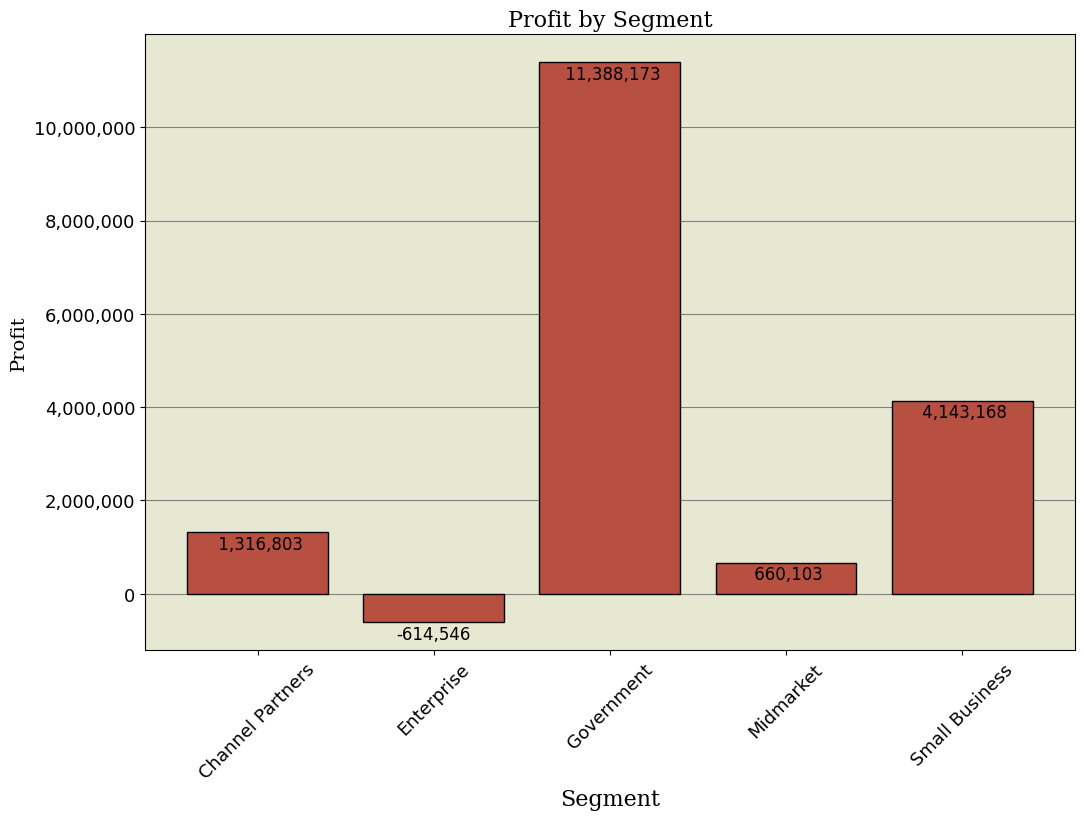

''

In [ ]:
#Create a sample graph (e.g., profit by company)

plt.figure(figsize=(10, 6))
# Replace with your column name (e.g., "Company")
profit_by_segment = df_copy.groupby("segment")["profit"].sum().reset_index()
profit_by_segment.sort_values(by="profit", ascending=False)

#Plot the bar chart
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(x=profit_by_segment['segment'], height=profit_by_segment['profit'], color='#B85042', edgecolor='black', zorder=2)

#Custom Font Dictionaries
font1 = {'family':'serif','color':'black','size':16}
font2 = {'family':'serif','color':'black','size':14}

#Set title, axis names, customize fonts.
ax.set_xlabel("Segment", fontdict=font1)
ax.set_ylabel("Profit", fontdict=font2)
ax.set_title("Profit by Segment", fontdict=font1)

#Customize graph
ax.grid(axis = 'y', color='grey')
ax.set_facecolor('#E7E8D1')
plt.xticks(rotation=45, ha='center', fontsize=13)
plt.yticks(fontsize=13)

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x):,}"))

#Annotate each bar
for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, 
        height - 50000, 
        f'{height: ,.0f}', 
        ha='center', 
        va='top', 
        color='black', 
        fontsize=12)


plt.savefig("C:/Users/Chris/Desktop/Documents/Company Financials Model Project/Graph_Visuals/profit_by_segment.png", dpi=100, bbox_inches="tight")
plt.show()
;

### Enterprise is a loss overall for the company of ~614k. I would like to understand why this is happening. There could be a high discount band for most of these customers. If this proves to be true, perhaps we could understand the reason for these discount bands. 

In [365]:
#Let's make a mask of the dataframe for segment and year to see what is happening.

MASKED_SEGMENT = df_copy['segment'] == "Enterprise"
enterprise_df = df_copy[MASKED_SEGMENT]
MASKED_SEGMENT_AND_YEAR = enterprise_df['year'] == 2014
enterprise_df_adjusted = enterprise_df[MASKED_SEGMENT_AND_YEAR]
enterprise_df_adjusted



,segment,country,product,discount band,units sold,manufacturing price,sale price,gross sales,discounts,sales,cogs,profit,date,month number,month name,year
11,Enterprise,Canada,Montana,None,"2,665.5",5.0,125.0,"333,187.5",0.0,"333,187.5","319,860.0","13,327.5",01/07/2014,7,July,2014
32,Enterprise,France,Velo,None,"1,804.0",120.0,125.0,"225,500.0",0.0,"225,500.0","216,480.0","9,020.0",01/02/2014,2,February,2014
36,Enterprise,United States of America,Velo,None,"2,821.0",120.0,125.0,"352,625.0",0.0,"352,625.0","338,520.0","14,105.0",01/08/2014,8,August,2014
47,Enterprise,Germany,Amarilla,None,"4,219.5",260.0,125.0,"527,437.5",0.0,"527,437.5","506,340.0","21,097.5",01/04/2014,4,April,2014
76,Enterprise,United States of America,Paseo,Low,727.0,10.0,125.0,"90,875.0",908.75,"89,966.25","87,240.0","2,726.25",01/06/2014,6,June,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,Enterprise,Germany,Carretera,High,"2,767.0",3.0,125.0,"345,875.0","51,881.25","293,993.75","332,040.0","-38,046.25",01/08/2014,8,August,2014
668,Enterprise,Germany,Carretera,High,"1,085.0",3.0,125.0,"135,625.0","20,343.75","115,281.25","130,200.0","-14,918.75",01/10/2014,10,October,2014
676,Enterprise,Germany,Paseo,High,"1,085.0",10.0,125.0,"135,625.0","20,343.75","115,281.25","130,200.0","-14,918.75",01/10/2014,10,October,2014
684,Enterprise,France,Velo,High,663.0,120.0,125.0,"82,875.0","12,431.25","70,443.75","79,560.0","-9,116.25",01/09/2014,9,September,2014


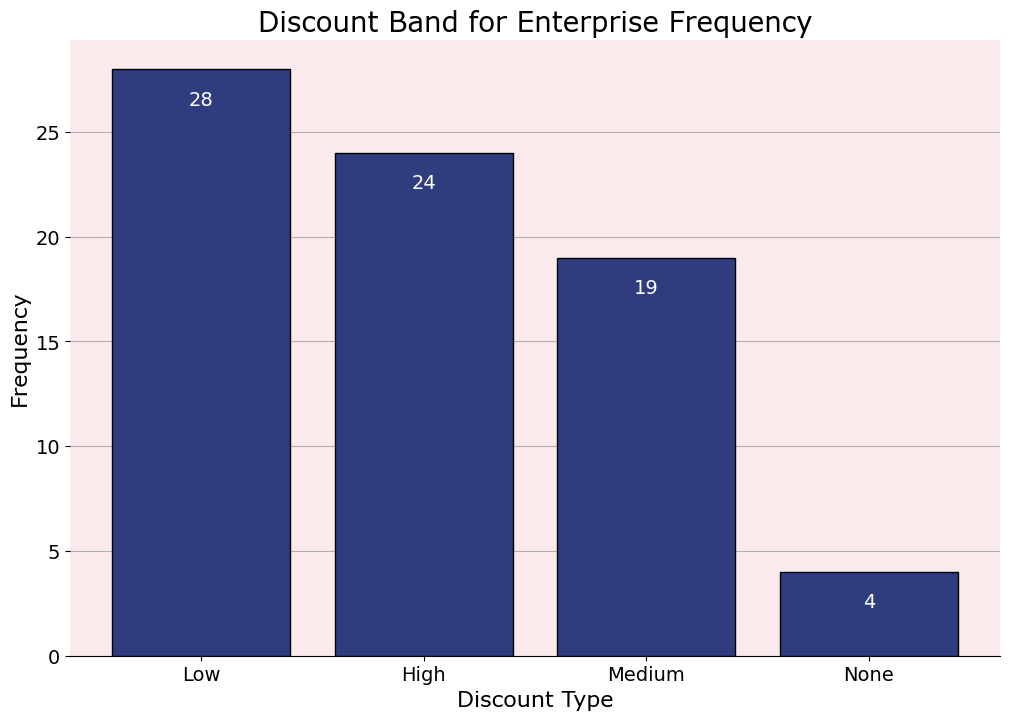

In [366]:
counts = enterprise_df_adjusted['discount band'].value_counts()

def plot_bar(x_data, y_data, plot_title, x_name, y_name, bar_color='#CC313D', face_color='#F7C5CC', annotate_color='black', annotate_font=10, annotate_placement=1):

    #Custom Fonts
    font1 = {'family':'verdana','color':'#000000','size':20}
    font2 = {'family':'verdana','color':'#000000','size':16}

    #Create the plot, set x & y axis titles, and graph title.
    fig, ax = plt.subplots(figsize=(12,8))
    ax.bar(x=x_data, height=y_data, color=bar_color, edgecolor='black', zorder=3)
    ax.set_title(plot_title, fontdict=font1)
    ax.set_xlabel(x_name, fontdict=font2)
    ax.set_ylabel(y_name,fontdict=font2)

    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)

    #Plot Styling for axes ticks
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax.set_facecolor(face_color)



    for bar in ax.patches:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, 
            height + annotate_placement, 
            f'{height:.0f}', 
            ha='center', 
            va='top', 
            color=annotate_color, 
            fontsize=annotate_font)

    ax.grid(axis='y')
    plt.xticks(ha='center')

    plt.savefig("C:/Users/Chris/Desktop/Documents/Company Financials Model Project/Graph_Visuals/enterprise_discount_frequency.png", dpi=100, bbox_inches="tight")
    plt.show()

plot_bar(counts.index, counts.values, "Discount Band for Enterprise Frequency", "Discount Type", "Frequency", '#2F3C7E', '#FBEAEB', 'white', 14, -1)


     

In [367]:
# Embed graph in Excel
output_path = "C:/Users/Chris/Desktop/Documents/Company Financials Model Project/cleaned_financials.xlsx"
book = load_workbook(output_path)
sheet = book.create_sheet("Charts")
img = Image("Graph_Visuals/profit_by_segment.png")
sheet.add_image(img, "A40")  # Adjust cell position
book.save(output_path)
print("Graph embedded in Excel!")

Graph embedded in Excel!


<Figure size 1000x600 with 0 Axes>

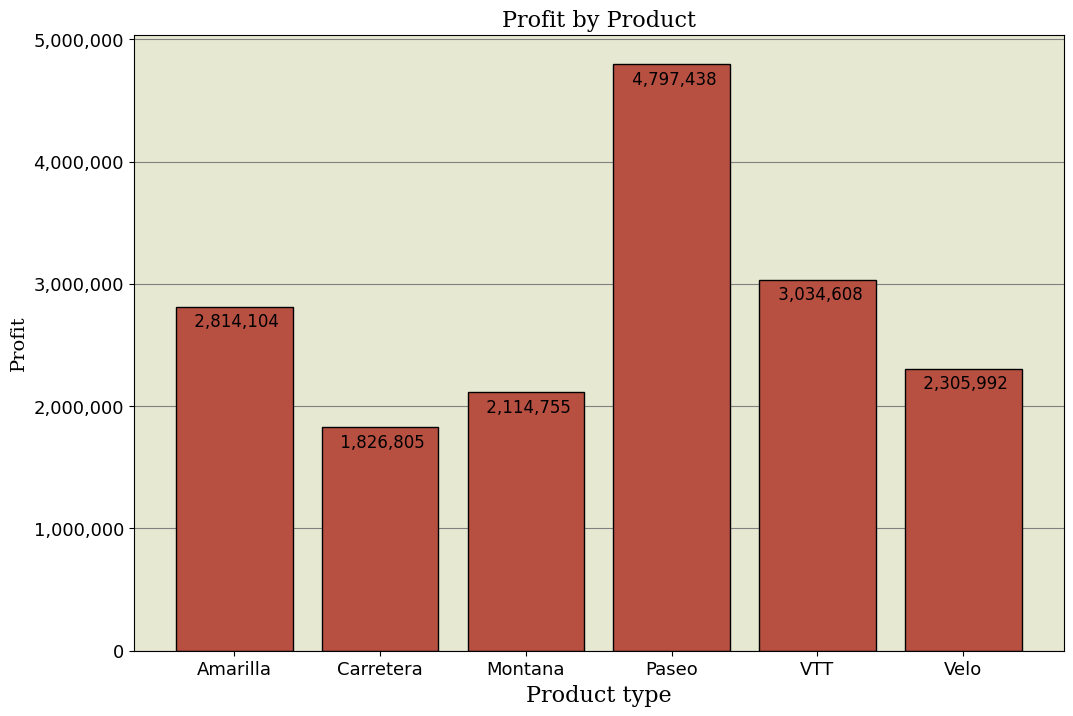

''

In [368]:
#Create a sample graph (e.g., profit by company)

plt.figure(figsize=(10, 6))
# Replace with your column name (e.g., "Company")
profit_by_product = df_copy.groupby("product")["profit"].sum().reset_index()
profit_by_product.sort_values(by="profit", ascending=False)

# Plot the bar chart
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(x=profit_by_product['product'], height=profit_by_product['profit'], color='#B85042', edgecolor='black', zorder=2)

#Custom Font Dictionaries
font1 = {'family':'serif','color':'black','size':16}
font2 = {'family':'serif','color':'black','size':14}

#Set title, axis names, customize fonts.
ax.set_xlabel("Product type", fontdict=font1)
ax.set_ylabel("Profit", fontdict=font2)
ax.set_title("Profit by Product", fontdict=font1)

#Customize graph
ax.grid(axis = 'y', color='grey')
ax.set_facecolor('#E7E8D1')
plt.xticks(rotation=0, ha='center', fontsize=13)
plt.yticks(fontsize=13)

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x):,}"))

#Annotate each bar
for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, 
        height - 50000, 
        f'{height: ,.0f}', 
        ha='center', 
        va='top', 
        color='black', 
        fontsize=12)


plt.savefig("C:/Users/Chris/Desktop/Documents/Company Financials Model Project/Graph_Visuals/profit_by_product.png", dpi=100, bbox_inches="tight")
plt.show()
;

In [369]:
# Embed graph in Excel
output_path = "C:/Users/Chris/Desktop/Documents/Company Financials Model Project/cleaned_financials.xlsx"
book = load_workbook(output_path)
sheet = book.create_sheet("Charts")
img = Image("Graph_Visuals/profit_by_product.png")
sheet.add_image(img, "A60")  # Adjust cell position
book.save(output_path)
print("Graph embedded in Excel!")

Graph embedded in Excel!


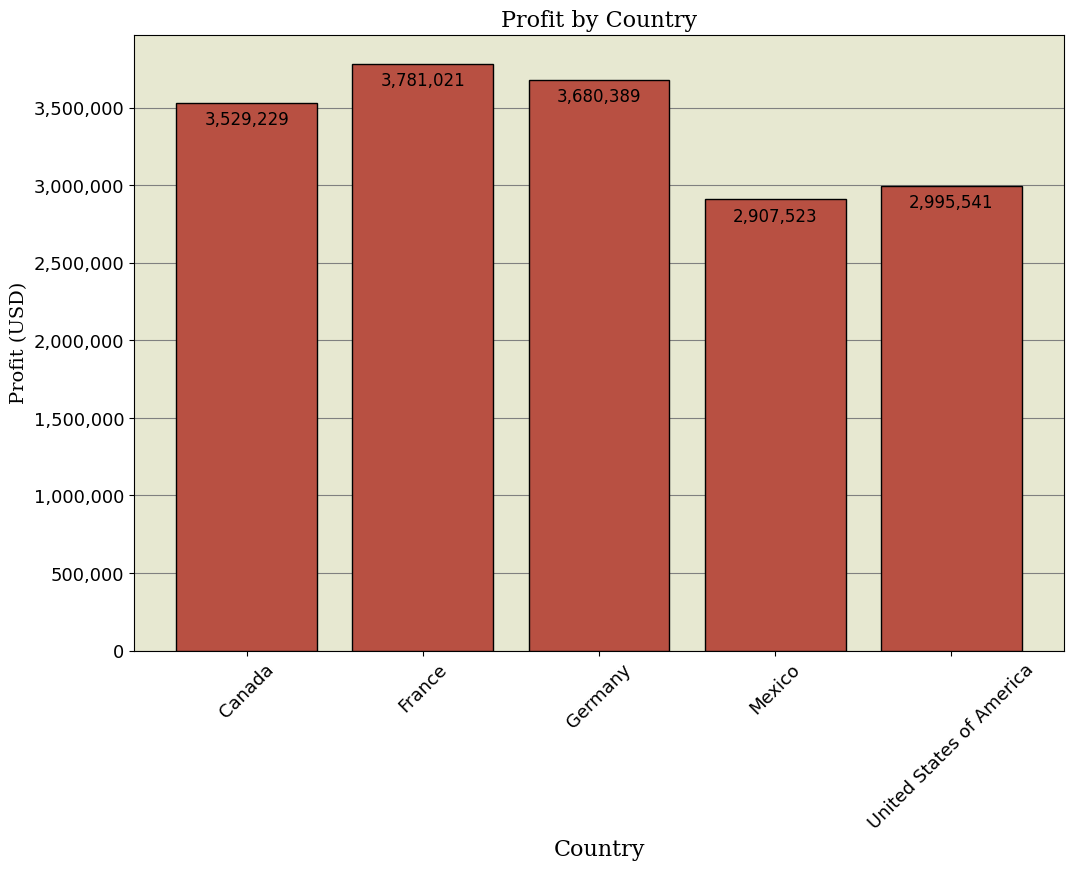

In [377]:
profit_by_country = df_copy.groupby("country")["profit"].sum().reset_index()
profit_by_country.sort_values(by="profit", ascending=False)

fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(x=profit_by_country['country'], height=profit_by_country['profit'], color='#B85042', edgecolor='black', zorder=3)
ax.set_xlabel("Country", fontdict={'family':'serif','color':'black','size':16})
ax.set_ylabel("Profit (USD)", fontdict={'family':'serif','color':'black','size':14})
ax.set_title("Profit by Country", fontdict={'family':'serif','color':'black','size':16})
ax.grid(axis='y', color='grey')
ax.set_facecolor('#E7E8D1')
plt.xticks(rotation=45, ha='center', fontsize=13)
plt.yticks(fontsize=13)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x):,}"))
for bar in ax.patches:
    height = bar.get_height()
    label_pos = height + 50000 if height < 0 else height - 50000
    va_pos = 'bottom' if height < 0 else 'top'
    ax.text(bar.get_x() + bar.get_width() / 2, 
            label_pos, 
            f'{height:,.0f}', 
            ha='center', 
            va=va_pos, 
            color='black', 
            fontsize=12)
plt.savefig("C:/Users/Chris/Desktop/Documents/Company Financials Model Project/Graph_Visuals/profit_by_country.png", dpi=100, bbox_inches="tight")
plt.show()

In [371]:
#This confirms that months are listed alphabetically and not chronologically which would be better for visualization.
profit_by_month

,month name,profit
4,January,"814,028.6900000001"
3,February,"1,148,547.3900000001"
7,March,"669,866.87"
0,April,"929,984.58"
8,May,"828,640.0599999999"
6,June,"1,473,753.82"
5,July,"923,865.69"
1,August,"791,066.4199999999"
11,September,"1,023,132.24"
10,October,"1,781,985.92"


In [372]:
#Create mask for 2014 only
YEAR_MASK = df_copy['year'] == 2014

#Apply mask to new df.
df_2014 = df_copy[YEAR_MASK]

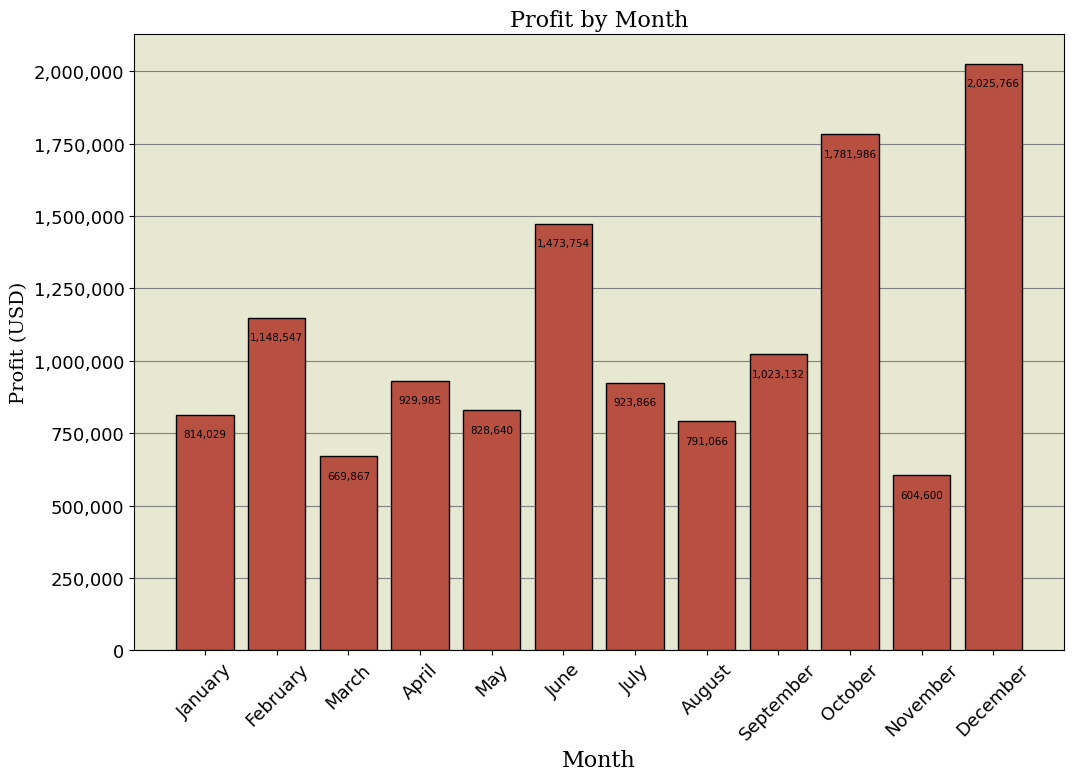

In [378]:
# Question: Which month has the best profit in 2014?

profit_by_month = df_2014.groupby("month name")["profit"].sum().reset_index()

#Create chronological order for months instead of alphabetical order.
month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]

#Convert month to categorical with specified values.
profit_by_month["month name"] = pd.Categorical(profit_by_month["month name"], 
                                               categories=month_order, 
                                               ordered=True)
#Sort by the categorical order
profit_by_month = profit_by_month.sort_values("month name")

#Set the plot for the graph. Set the name of the X and Y axis, and title of the graph. Additionally, set some styling for aesthetic.
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(x=profit_by_month['month name'], height=profit_by_month['profit'], color='#B85042', edgecolor='black', zorder=3)
ax.set_xlabel("Month", fontdict={'family':'serif','color':'black','size':16})
ax.set_ylabel("Profit (USD)", fontdict={'family':'serif','color':'black','size':14})
ax.set_title("Profit by Month", fontdict={'family':'serif','color':'black','size':16})

#Plot Styling
ax.grid(axis='y', color='grey')
ax.set_facecolor('#E7E8D1')
plt.xticks(rotation=45, ha='center', fontsize=13)
plt.yticks(fontsize=13)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x):,}"))

#for loop to annotate each bar.
for bar in ax.patches:
    height = bar.get_height()
    label_pos = height + 50000 if height < 0 else height - 50000
    va_pos = 'bottom' if height < 0 else 'top'
    ax.text(bar.get_x() + bar.get_width() / 2, 
            label_pos, 
            f'{height:,.0f}', 
            ha='center', 
            va=va_pos, 
            color='black', 
            fontsize=7.5)
    

plt.savefig("C:/Users/Chris/Desktop/Documents/Company Financials Model Project/Graph_Visuals/profit_by_month.png", dpi=100, bbox_inches="tight")
plt.show()


In [379]:
#Read data from Excel (your cleaned_financials.xlsx)
new_df = pd.read_excel("C:/Users/Chris/Desktop/Documents/Company Financials Model Project/cleaned_financials.xlsx", sheet_name="Financials")

#Write summaries to Excel
with pd.ExcelWriter("C:/Users/Chris/Desktop/Documents/Company Financials Model Project/fpa_model.xlsx", engine="openpyxl") as writer:
    new_df.to_excel(writer, sheet_name="Raw_Data", index=False)
    profit_by_year.to_excel(writer, sheet_name="Profit_by_Year", index=False)
    profit_by_country.to_excel(writer, sheet_name="Profit_by_Country", index=False)
    profit_by_month.to_excel(writer, sheet_name="Profit_by_Month", index=False)
    profit_by_product.to_excel(writer, sheet_name="Profit_by_Product", index=False)
    profit_by_segment.to_excel(writer, sheet_name="Profit_by_Segment", index=False)
    counts.to_excel(writer, sheet_name="Enterprise_Discount_Band", index=False)

#drop graphs into tab for readily use
book = load_workbook("C:/Users/Chris/Desktop/Documents/Company Financials Model Project/fpa_model.xlsx")
sheet = book.create_sheet("Charts")
img1 = Image("C:/Users/Chris/Desktop/Documents/Company Financials Model Project/Graph_Visuals/profit_by_year.png")
img2 = Image("C:/Users/Chris/Desktop/Documents/Company Financials Model Project/Graph_Visuals/profit_by_country.png")
img3 = Image("C:/Users/Chris/Desktop/Documents/Company Financials Model Project/Graph_Visuals/profit_by_month.png")
img4 = Image("C:/Users/Chris/Desktop/Documents/Company Financials Model Project/Graph_Visuals/profit_by_product.png")
img5 = Image("C:/Users/Chris/Desktop/Documents/Company Financials Model Project/Graph_Visuals/profit_by_segment.png")
img6 = Image("C:/Users/Chris/Desktop/Documents/Company Financials Model Project/Graph_Visuals/enterprise_discount_frequency.png")
sheet.add_image(img1, "A1")
sheet.add_image(img2, "A20")
sheet.add_image(img3, "A40")
sheet.add_image(img4, "A60")
sheet.add_image(img5, "A80")
sheet.add_image(img6, "A100")
book.save("C:/Users/Chris/Desktop/Documents/Company Financials Model Project/fpa_model.xlsx")
print("FP&A model updated in Excel!")

FP&A model updated in Excel!
